In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rdkit-pypi
%tensorflow_version 1.15.3

     |████████████████████████████████| 22.5 MB 1.3 MB/s 
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.3`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


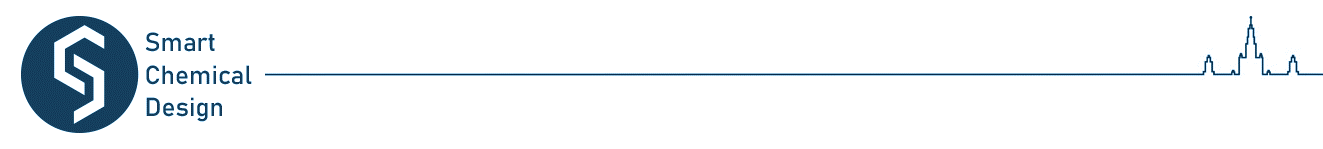

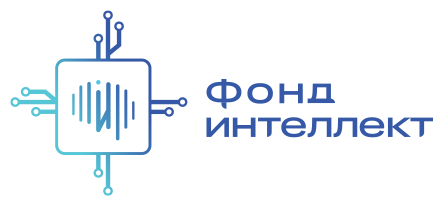

<h1>Генеративные модели в химии</h1>

Цели практикума
<ul>
<li>Научиться работать с генеративными моделями</li>
<li>Получить набор молекул с заданными свойствами</li>
</ul>

Задачи практикума
<ul>
<li>Тренировка и перетренировка генертивной модели</li>
<li>Определение желаемых свойств соедиенения</li>
<li>Отбор наилучших молекул</li>
</ul>

Неоходимо выбрать свою любимую молекулу размером до 9 атомов и сделать так, чтобы модель сгенерировала похожие соединения

Полезные ссылки
<ul>
<li>https://arxiv.org/abs/1805.11973</li>
<li>https://marvinjs-demo.chemaxon.com/latest/demo.html</li>
</ul>

In [ ]:
import tensorflow as tf
import sys
import subprocess
import os

drive_main_path = "/content/drive/MyDrive/kaka/MolGAN"

sys.path.append(drive_main_path)

from utils.sparse_molecular_dataset import SparseMolecularDataset
from utils.trainer import Trainer
from utils.utils import *

from models.gan import GraphGANModel
from models import encoder_rgcn, decoder_adj, decoder_dot, decoder_rnn

from optimizers.gan import GraphGANOptimizer
from rdkit import RDLogger
from rdkit import Chem

RDLogger.DisableLog('rdApp.*')


In [ ]:
# generate dataset
# data = SparseMolecularDataset()
# data.generate(os.path.join(drive_main_path, 'data/gdb9_9nodes.sdf'))
# data.save(os.path.join(drive_main_path, 'data/gdb9_9nodes.sparsedataset'))

In [ ]:
n_samples = 5000
z_dim = 8

data = SparseMolecularDataset()
data.load(os.path.join(drive_main_path, 'data/gdb9.sparsedataset'))
model_folder = os.path.join(drive_main_path, 'output_upgraded')

In [ ]:
model = GraphGANModel(data.vertexes,
                      data.bond_num_types,
                      data.atom_num_types,
                      z_dim,
                      decoder_units=(128, 256, 512),
                      discriminator_units=((128, 64), 128, (128, 64)),
                      decoder=decoder_adj,
                      discriminator=encoder_rgcn,
                      soft_gumbel_softmax=False,
                      hard_gumbel_softmax=False,
                      batch_discriminator=False)

# optimizer
optimizer = GraphGANOptimizer(model, learning_rate=1e-3, feature_matching=False)

# session
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(tf.global_variables_initializer())

# trainer
trainer = Trainer(model, optimizer, session)

trainer.load(model_folder)




Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device


INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/kaka/MolGAN/output_upgraded/model.ckpt
2022-04-19 21:28:32 Model loaded from /content/drive/MyDrive/kaka/MolGAN/output_upgraded!


In [ ]:
# Тут начинаются задания
mols = samples(data, model, session, model.sample_z(n_samples), sample=True)
mols  = [mol.GetMol() for mol in mols if mol is not None]
smiles = [Chem.MolToSmiles(mol) for mol in mols]

print(smiles)
pic = mols2grid_image(mols[:6], 2)
pic.show()
print(type(pic))

['C1CC2CC1OC1CC21', 'NOOCCOC1=C=C1', 'CCC1(C)CC2(C)CC12', 'CC1CC23CCC2C1C3', '*.CCC1C(C)CC1O', 'C#CCOC1C2CC21O', 'CCO.CNC(C)C#N', 'CC1C2CC23CC13C.O', 'CC12OC3(C)C(C1O)C23', 'C#CC1CCCC1OC', 'C#CC1CC2CC1C2O', 'CCON(C)C(C)C#N', '*.N#CCC1C2CCN12', '*.CCC1C(C)C2CC12', 'C#CC12CC3CC1C3C2', 'C#CC1CC2CC12OC', 'CC1CCC1(C)OC=O', 'CC1C2CC(O)C1CO2', 'CCC1(C)C(C)C2CC21', 'CCCNC=O.CNC', 'O=C1NC2CC=CC1C2', 'CC(C#N)C1CC1OO', 'C1C2CC3C1OC1C2C31', 'C1OCC2COC3C1=C23', 'CC1OC2CCOC1C2', 'C#N.CC1CC(O)C1N', 'C#CC1CC2C(O)C2O1', 'CC(O)C1CC(O)C1O', 'C#C.CC1CC(O)C1.N', '*.CCC(OC)C1CC1', 'C1C2CC3OC(CC13)O2', 'CC(C)CNC(C)C#N', 'N#CC1CC2C(O)C2N1', 'CC1OOCC(O)C1C', 'CC1CCCCC(=O)O1', 'N#CC1CCC(CO)C1', '*.N#CCC1C2CCN12', 'C.CC12CC3CC1C3C2', 'CC12COCC13COC23', 'C#CC1CCCC1CO', 'O=C1NC2CC=CC1C2', 'CC1=CC(C=O)CC1C', 'C#CC1CC2CNC2O1', 'C#CC1CC2C(O)C2O1', 'CC1CC=CCC(=O)O1', 'CC1CCC2(CCO2)C1', 'C#CC(C)C12CC1CO2', 'CC1CCCOC2C=C12', 'CC12CCC1CC(=O)O2', 'C.CC.CC(CO)NO', 'C#CC1CC2CCC2O1', 'CC(C)CNC(C)C#N', 'C#N.NCC1NCCO1', '*.N#C

### Проверим активность к herg

In [ ]:
from rdkit.Chem import MACCSkeys, AllChem, DataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit import Chem
import joblib
import pandas as pd

filename = os.path.join(drive_main_path, 'herg_model.joblib.pkl')
herg_model = joblib.load(filename)


def mols_to_x(mols):
  X = []
  for i in range(len(mols)):
    arr = np.zeros((1,), dtype=int)
    descr = AllChem.GetHashedAtomPairFingerprint(mols[i])
    DataStructs.ConvertToNumpyArray(descr, arr)
    X.append(arr)
  X = np.stack(X, axis=0)
  return X

In [ ]:
activity = herg_model.predict(mols_to_x(mols))
np.unique(activity)

array([0])

In [ ]:
activity = herg_model.predict_proba(mols_to_x(mols))
df = pd.DataFrame(activity)
activity_mols = df[df[1]>0.02]
activity_mols

,0,1
63,0.970,0.030
416,0.978,0.022
1308,0.976,0.024
1333,0.976,0.024
1636,0.970,0.030
2285,0.966,0.034
2328,0.968,0.032
2408,0.970,0.030
3044,0.966,0.034
3132,0.970,0.030


In [ ]:
len(activity_mols)

11

In [ ]:
activ_mols_lst = list(activity_mols.index)
activ_mols_lst

[63, 416, 1308, 1333, 1636, 2285, 2328, 2408, 3044, 3132, 3395]

### Проверим LogP(mol)

Все примеры сгенерированных молекул

In [ ]:
from utils.molecular_metrics import MolecularMetrics
from rdkit import RDLogger
from rdkit.Chem import Crippen

def water_octanol_partition_coefficient_scores(mols, norm=False):
    scores = [MolecularMetrics._avoid_sanitization_error(lambda: Crippen.MolLogP(mol)) if mol is not None else None for mol in mols]
    scores = np.array(list(map(lambda x: -3 if x is None else x, scores)))  # заменяем на -3 если None

    scores = [1 if -0.4 <= x <=5.6 else 0 for x in scores]
    # print(scores)

    return np.array(scores)

In [ ]:
df_logP = pd.DataFrame(water_octanol_partition_coefficient_scores(mols, norm=False))
df_logP.shape[0]

3738

In [ ]:
df_logP.value_counts()

1    3360
0     378
dtype: int64

In [ ]:
df_logP.value_counts() / df_logP.shape[0]

1    0.898876
0    0.101124
dtype: float64

Молекулы, для которых вероятность активности больше двух процентов

In [ ]:
activ_mols = []
activ_mols = [mols[k] for k in activ_mols_lst]
df_logP_activ = pd.DataFrame(water_octanol_partition_coefficient_scores(activ_mols, norm=False))
df_logP_activ['mol_index'] = activ_mols_lst
df_logP_activ

,0,mol_index
0,1,63
1,1,416
2,1,1308
3,1,1333
4,1,1636
5,0,2285
6,0,2328
7,1,2408
8,0,3044
9,1,3132


In [ ]:
len(df_logP_activ[df_logP_activ[0] == 1])

8

In [ ]:
idx = df_logP_activ[df_logP_activ[0] == 1]['mol_index'].values
result_mols = [mols[k] for k in idx]

In [ ]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True


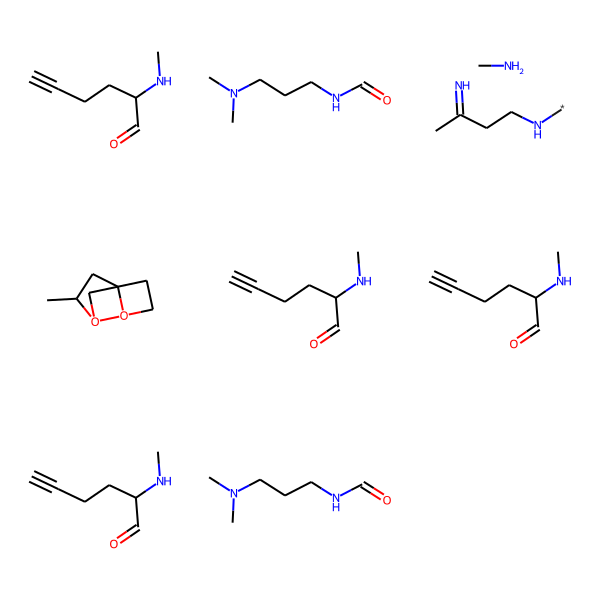

In [ ]:
Draw.MolsToGridImage(result_mols)